# Prikaz poligona


In [1]:
from IPython import *
from IPython.display import *


In [2]:
import copy
import math
import numbers
import textwrap


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sym
from mpl_toolkits.mplot3d import Axes3D


In [4]:
import shapely as sh
import shapely.geometry as gm


In [5]:
%matplotlib inline


In [6]:
sym.init_printing()


In [7]:
ox = pd.read_csv(
    'data/oct.tsv',
    sep = "\t",
    header = None,
    index_col = None,
    names = [
        '{coor:s}{ind:d}'.format(
            coor = 'y' if i % 2 else 'x',
            ind = (i >> 1) + 1
        ) for i in range(2 * 8)
    ]
)


In [8]:
ox.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
x1    360 non-null float64
y1    360 non-null float64
x2    360 non-null float64
y2    360 non-null float64
x3    360 non-null float64
y3    360 non-null float64
x4    360 non-null float64
y4    360 non-null float64
x5    360 non-null float64
y5    360 non-null float64
x6    360 non-null float64
y6    360 non-null float64
x7    360 non-null float64
y7    360 non-null float64
x8    360 non-null float64
y8    360 non-null float64
dtypes: float64(16)
memory usage: 45.1 KB


In [9]:
ox.head()


,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8
0,0.278305,-0.417096,-0.023831,0.392384,0.366053,0.417096,0.023908,0.408666,-0.366053,0.347628,-0.142939,-0.080478,0.136775,-0.153312,-0.007380,-0.175735
1,-0.414478,-0.313464,0.240893,-0.311384,-0.158975,-0.307222,0.268369,-0.288205,0.301900,-0.179332,0.414478,0.245851,0.073917,0.313464,-0.016092,-0.239393
2,0.226891,-0.455999,0.236787,0.006273,0.256480,-0.242030,0.247441,0.025859,0.283168,0.172571,0.052329,0.302268,-0.183305,0.455999,-0.283168,-0.195690
3,0.049137,-0.229927,0.085738,-0.096527,0.492296,-0.098080,0.397636,-0.031356,-0.093993,0.229927,0.259710,0.034310,-0.162775,0.084607,-0.492296,0.076782
4,0.395243,-0.332207,0.220991,-0.137303,0.256903,-0.227516,0.237039,-0.263754,-0.306712,0.332207,-0.395243,0.280274,-0.053763,-0.187446,-0.060554,-0.141717


In [10]:
def extract_octogon (i, df = ox):
    return gm.Polygon(
        [
            (
                df.loc[i, 'x{ind:d}'.format(ind = j + 1)],
                df.loc[i, 'y{ind:d}'.format(ind = j + 1)]
            ) for j in range(8)
        ]
    )


In [11]:
P = extract_octogon(0)


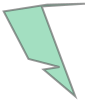

In [12]:
P


In [13]:
P.bounds
